In [13]:
import numpy as np
import pandas as pd
from time import time
from sklearn.cluster import KMeans
from scipy.spatial import distance

In [2]:
path = "./CDR_FINAL/"
filename = "table_with_kid_1.csv"
df = pd.read_csv(path + filename, error_bad_lines=False)

In [6]:
df = df.drop('MINING_DW_SUBSCR_NO', 1)

In [9]:
kmeans = KMeans(n_clusters=8, max_iter = 3000000).fit(df.values)

In [45]:
rows = df.iloc()
errors = []
for i in range(len(df)):
    if kmeans.labels_[i] == 0:
        center = kmeans.cluster_centers_[kmeans.labels_[i]]
        row = rows[i].values
        errors.append(distance.euclidean(center, row))

In [46]:
import plotly.offline as py
import plotly.graph_objs as go

data = [go.Histogram(x=errors)]

py.plot(data, filename='basic_histogram')

C:\ProgramData\Anaconda3\lib\site-packages\plotly\offline\offline.py:459: UserWarning:

Your filename `basic_histogram` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\VIPLAB\\Desktop\\preprocess_py\\basic_histogram.html'

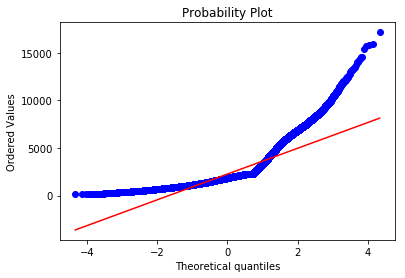

In [47]:
import pylab 
import scipy.stats as stats
  
stats.probplot(errors, dist="norm", plot=pylab)
pylab.show()

In [38]:
df_label['label'] = kmeans.labels_

In [40]:
df_label.groupby('label').count()

,hour(7~11)_time,hour(12~13)_time,hour(14~19)_time,hour(20~3)_time,hour(4~6)_time,VOICE_workday_time_avg,VOICE_holiday_time_avg
label,,,,,,,
0,92214,92214,92214,92214,92214,92214,92214
1,3,3,3,3,3,3,3
2,1530,1530,1530,1530,1530,1530,1530
3,71,71,71,71,71,71,71
4,12731,12731,12731,12731,12731,12731,12731
5,22,22,22,22,22,22,22
6,142,142,142,142,142,142,142
7,4,4,4,4,4,4,4


In [43]:
df = df.drop('label', 1)

In [48]:
len(errors)

92214